In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
url = 'https://es.wikipedia.org/wiki/Anexo:Tabla_hist%C3%B3rica_de_la_Copa_Libertadores'
border = '1'

In [3]:
r = requests.get(url)

In [4]:
soup = BeautifulSoup(r.text, 'html.parser')

In [5]:
df = soup.find('table', attrs = {'border':border})

In [6]:
table = pd.read_html(str(df))

In [7]:
copa_libertadores = pd.DataFrame(table[0])

In [8]:
copa_libertadores.head(10)

,Pos.,Equipo,País,Part.,Títulos,PJ,PG,PE,PP,GF,GC,DG,PTOS
0,1,River Plate,Argentina,36,4,354,172,94,88,581,371,+210,540
1,2,Nacional,Uruguay,47,3,385,165,104,118,542,418,+124,506
2,3,Boca Juniors,Argentina,29,6,294,154,74,66,458,266,+192,481
3,4,Peñarol,Uruguay,47,5,367,163,79,125,547,443,+104,456
4,5,Cerro Porteño,Paraguay,41,0,309,113,89,107,401,406,–5,380
5,6,Olimpia,Paraguay,42,3,306,122,88,96,438,379,+59,376
6,7,Grêmio,Brasil,20,3,195,102,41,52,298,175,+123,334
7,8,Palmeiras,Brasil,20,1,186,100,34,52,335,203,+132,300
8,9,Cruzeiro,Brasil,17,2,166,95,32,39,307,158,+149,285
9,10,São Paulo,Brasil,20,3,185,91,43,51,283,175,+108,284


In [9]:
tr = str.maketrans('áéíóú', 'aeiou')

In [10]:
# modificando las columnas
copa_libertadores.columns = copa_libertadores.columns.str.lower().str.replace('.','').str.translate(tr)
copa_libertadores.rename(columns = {'pos': 'posicion', 'part': 'participaciones'}, inplace = True)
copa_libertadores.columns

Index(['posicion', 'equipo', 'pais', 'participaciones', 'titulos', 'pj', 'pg',
       'pe', 'pp', 'gf', 'gc', 'dg', 'ptos'],
      dtype='object')

In [11]:
# arreglando la serie de diferencia de goles (dg)
copa_libertadores.dg = [value.strip('+').replace('–', '-') for value in copa_libertadores.dg]

In [12]:
copa_libertadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   posicion         211 non-null    int64 
 1   equipo           211 non-null    object
 2   pais             211 non-null    object
 3   participaciones  211 non-null    int64 
 4   titulos          211 non-null    int64 
 5   pj               211 non-null    int64 
 6   pg               211 non-null    int64 
 7   pe               211 non-null    int64 
 8   pp               211 non-null    int64 
 9   gf               211 non-null    int64 
 10  gc               211 non-null    int64 
 11  dg               211 non-null    object
 12  ptos             211 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 21.6+ KB


In [13]:
# arreglando el tipo de datos
copa_libertadores.pais = copa_libertadores.pais.astype('category')
copa_libertadores.dg = copa_libertadores.dg.astype(int)

# Estadisticas de equipos de peruanos en la Copa Libertadores

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
import numpy as np

In [16]:
copa_libertadores.pais.value_counts()

Brasil       28
Venezuela    25
Perú         23
Argentina    23
Chile        19
México       18
Ecuador      18
Bolivia      18
Colombia     15
Uruguay      13
Paraguay     11
Name: pais, dtype: int64

In [17]:
# seleccionamos los 23 equipos peruanos que han participado en la copa libertadores
eq_per = copa_libertadores[copa_libertadores.pais == 'Perú']
eq_per.head(10)

,posicion,equipo,pais,participaciones,titulos,pj,pg,pe,pp,gf,gc,dg,ptos
20,21,Universitario,Perú,31,0,219,69,69,81,259,291,-32,220
28,20,Sporting Cristal,Perú,35,0,223,65,58,100,283,354,-71,184
35,36,Alianza Lima,Perú,27,0,164,37,31,96,154,283,-169,142
76,77,Cienciano,Perú,6,0,36,12,4,20,42,62,-20,40
88,89,Juan Aurich,Perú,4,0,28,9,5,14,38,54,-16,30
90,91,Melgar,Perú,6,0,36,10,3,23,29,60,-31,28
94,95,Cusco[3]​,Perú,4,0,24,7,4,13,18,35,-17,25
102,103,Universidad San Martín de Porres,Perú,3,0,20,6,2,12,19,35,-16,20
113,114,Unión Huaral,Perú,3,0,20,4,8,8,18,34,-16,16
133,134,Sport Boys,Perú,6,0,37,3,7,27,28,80,-52,13


In [18]:
sns.set()

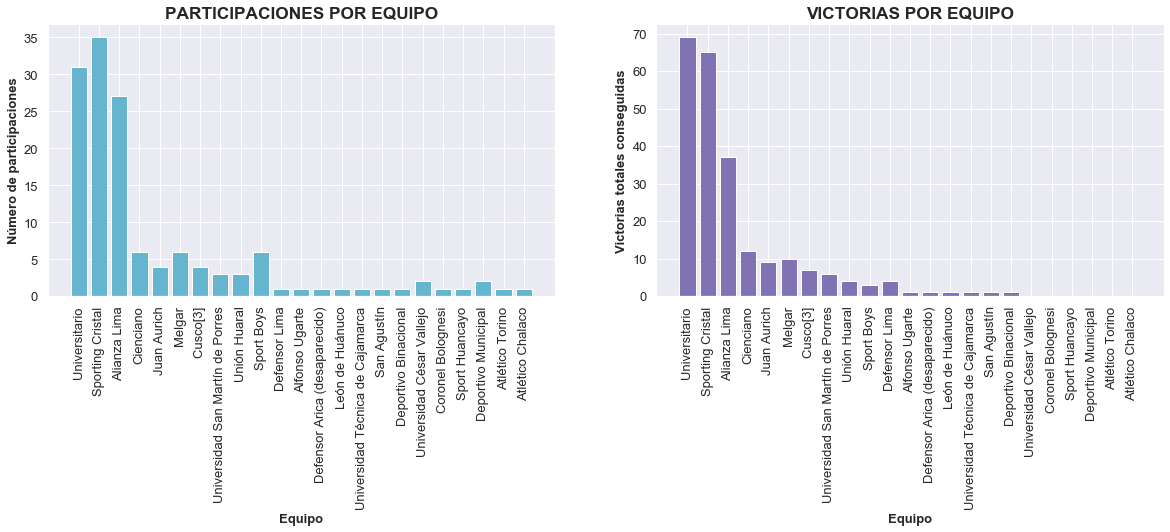

In [19]:
# número de ediciones, victorias totales
fig, ax = plt.subplots(1, 2)
fig.set_size_inches([20,5])

ax[0].bar(eq_per.equipo, eq_per.participaciones, color ='c')
ax[0].set_xlabel('Equipo', fontsize = 13, fontweight = 'bold')
ax[0].set_ylabel('Número de participaciones', fontsize = 13, fontweight = 'bold')
ax[0].set_title('PARTICIPACIONES POR EQUIPO', fontsize = 'x-large', fontweight = 'bold')
ax[0].set_xticklabels(eq_per.equipo, rotation = 90)
ax[0].tick_params(labelsize = 13)

ax[1].bar(eq_per.equipo, eq_per.pg, color = 'm')
ax[1].set_xlabel('Equipo', fontsize = 13, fontweight = 'bold')
ax[1].set_ylabel('Victorias totales conseguidas', fontsize = 13, fontweight = 'bold')
ax[1].set_title('VICTORIAS POR EQUIPO', fontsize = 'x-large', fontweight = 'bold')
ax[1].set_xticklabels(eq_per.equipo, rotation = 90)
ax[1].tick_params(labelsize = 13)
plt.show()

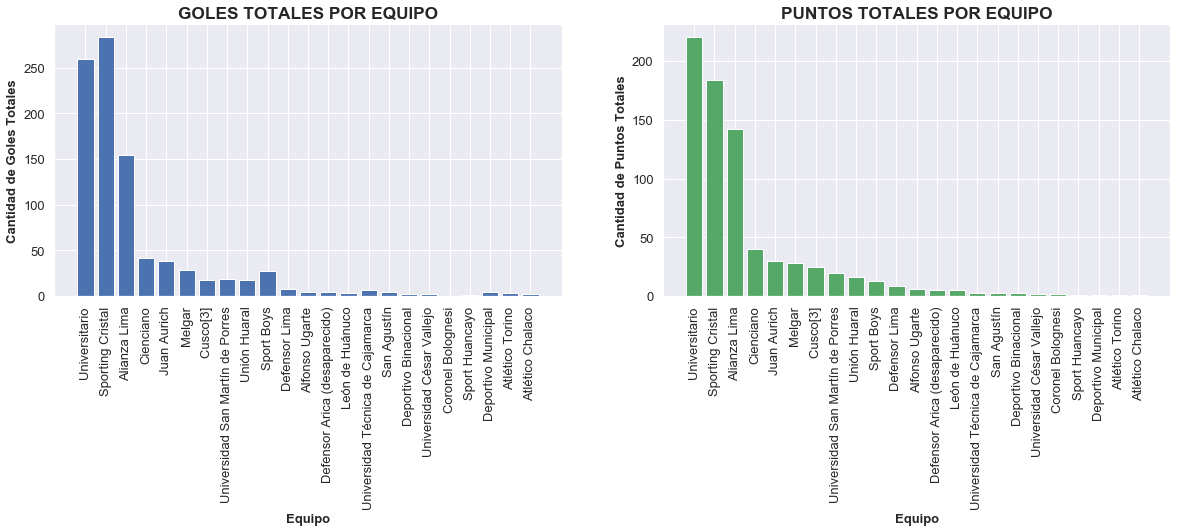

In [20]:
# goles totales, puntos totales
fig, ax = plt.subplots(1,2)
fig.set_size_inches([20,5])

ax[0].bar(eq_per.equipo, eq_per.gf, color ='b')
ax[0].set_xlabel('Equipo', fontsize = 13, fontweight = 'bold')
ax[0].set_ylabel('Cantidad de Goles Totales', fontsize = 13, fontweight = 'bold')
ax[0].set_title('GOLES TOTALES POR EQUIPO', fontsize = 'x-large', fontweight = 'bold')
ax[0].set_xticklabels(eq_per.equipo, rotation = 90)
ax[0].tick_params(labelsize = 13)

ax[1].bar(eq_per.equipo, eq_per.ptos, color ='g')
ax[1].set_xlabel('Equipo', fontsize = 13, fontweight = 'bold')
ax[1].set_ylabel('Cantidad de Puntos Totales', fontsize = 13, fontweight = 'bold')
ax[1].set_title('PUNTOS TOTALES POR EQUIPO', fontsize = 'x-large', fontweight = 'bold')
ax[1].set_xticklabels(eq_per.equipo, rotation = 90)
ax[1].tick_params(labelsize = 13)

In [21]:
def ecdf(data):
    """Cálculo de la funcón de distribución acumulada empírica."""
    # Número de observaciones: n
    n = len(data)
    # x-valores para la ECDF: x
    x = sorted(data)
    # y-valores para la ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

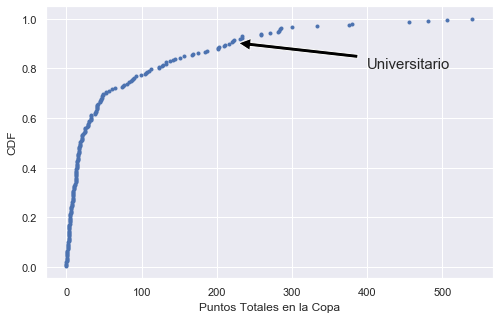

In [45]:
# cumulative distribution function (puntaje)
x_puntos, y_puntos = ecdf(copa_libertadores.ptos)
plt.figure(figsize=(8,5))
plt.plot(x_puntos, y_puntos, marker = '.', linestyle = 'none')
plt.ylabel('CDF')
plt.xlabel('Puntos Totales en la Copa')
plt.annotate('Universitario', xy = (220,0.905213), xytext = (400,0.8), 
             arrowprops = dict(facecolor='black', shrink = 0.05), fontsize = 15)
plt.show()

In [23]:
# identificar los percentiles: u, sc y al
cl_ecdf = pd.DataFrame({'x':x_puntos, 'y':y_puntos})
universitario = np.round((1 - cl_ecdf[cl_ecdf.x == 220]['y'])*100, 2)
cristal = np.round((1 - cl_ecdf[cl_ecdf.x == 184]['y'])*100, 2)
alianza = np.round((1 - cl_ecdf[cl_ecdf.x == 142]['y'])*100, 2)
print('PERCENTILES \n')
print('UNIVERSITARIO: ' + str(universitario.to_string(index = False)) +'%\n'\
     'SPORTING CRISTAL: ' + str(cristal.to_string(index = False)) +'%\n'\
     'ALIANZA LIMA: ' + str(alianza.to_string(index = False)) +'%')

PERCENTILES 

UNIVERSITARIO:  9.48%
SPORTING CRISTAL:  13.27%
ALIANZA LIMA:  16.59%


In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
# victorias/edición, goles/edición, puntos/edición, victorias/partidos, goles/partidos, puntos/partidos
# indicadores por edición
eq_per['pg/ed'] = np.round(eq_per['pg']/eq_per['participaciones'], 2)
eq_per['gf/ed'] = np.round(eq_per['gf']/eq_per['participaciones'], 2)
eq_per['pts/ed'] = np.round(eq_per['ptos']/eq_per['participaciones'], 2)
# indicadores por partido
eq_per['pg/pj'] = np.round(eq_per['pg']/eq_per['pj'], 2)
eq_per['pe/pj'] = np.round(eq_per['pe']/eq_per['pj'], 2)
eq_per['pp/pj'] = np.round(eq_per['pp']/eq_per['pj'], 2)
eq_per['gf/pj'] = np.round(eq_per['gf']/eq_per['pj'], 2)
eq_per['pts/pj'] = np.round(eq_per['ptos']/eq_per['pj'], 2)

In [26]:
# selección de los 10 mejores equipos peruanos que participaron de la Copa Libertadores
peru_10 = eq_per.head(10)
peru_10

,posicion,equipo,pais,participaciones,titulos,pj,pg,pe,pp,gf,...,dg,ptos,pg/ed,gf/ed,pts/ed,pg/pj,pe/pj,pp/pj,gf/pj,pts/pj
20,21,Universitario,Perú,31,0,219,69,69,81,259,...,-32,220,2.23,8.35,7.10,0.32,0.32,0.37,1.18,1.00
28,20,Sporting Cristal,Perú,35,0,223,65,58,100,283,...,-71,184,1.86,8.09,5.26,0.29,0.26,0.45,1.27,0.83
35,36,Alianza Lima,Perú,27,0,164,37,31,96,154,...,-169,142,1.37,5.70,5.26,0.23,0.19,0.59,0.94,0.87
76,77,Cienciano,Perú,6,0,36,12,4,20,42,...,-20,40,2.00,7.00,6.67,0.33,0.11,0.56,1.17,1.11
88,89,Juan Aurich,Perú,4,0,28,9,5,14,38,...,-16,30,2.25,9.50,7.50,0.32,0.18,0.50,1.36,1.07
90,91,Melgar,Perú,6,0,36,10,3,23,29,...,-31,28,1.67,4.83,4.67,0.28,0.08,0.64,0.81,0.78
94,95,Cusco[3]​,Perú,4,0,24,7,4,13,18,...,-17,25,1.75,4.50,6.25,0.29,0.17,0.54,0.75,1.04
102,103,Universidad San Martín de Porres,Perú,3,0,20,6,2,12,19,...,-16,20,2.00,6.33,6.67,0.30,0.10,0.60,0.95,1.00
113,114,Unión Huaral,Perú,3,0,20,4,8,8,18,...,-16,16,1.33,6.00,5.33,0.20,0.40,0.40,0.90,0.80
133,134,Sport Boys,Perú,6,0,37,3,7,27,28,...,-52,13,0.50,4.67,2.17,0.08,0.19,0.73,0.76,0.35


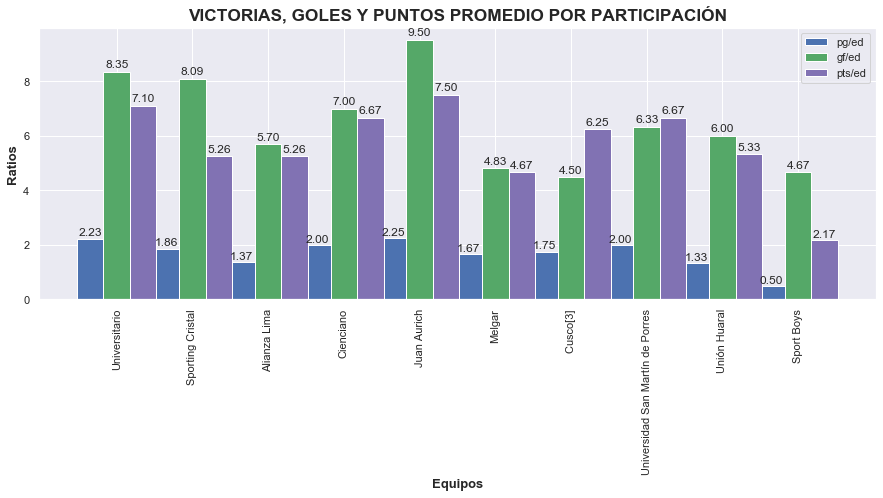

In [33]:
# pg/ed, gf/ed, pts/ed
n = len(peru_10)
ind = np.arange(n)
width = 0.35
fig, ax = plt.subplots()
fig.set_size_inches([15,5])
cont1 = ax.bar(ind, peru_10['pg/ed'], width, color='b')
cont2 = ax.bar(ind+width, peru_10['gf/ed'], width, color='g')
cont3 = ax.bar(ind+2*width, peru_10['pts/ed'], width, color='m')
ax.set_ylabel('Ratios', fontsize = 13, fontweight = 'bold')
ax.set_xlabel('Equipos', fontsize = 13, fontweight = 'bold')
ax.set_title('VICTORIAS, GOLES Y PUNTOS PROMEDIO POR PARTICIPACIÓN', fontsize = 'x-large', fontweight = 'bold')
ax.set_xticks(ind + width)# / 2)
ax.set_xticklabels((peru_10.equipo), rotation = 90)
ax.legend((cont1[0], cont2[0], cont3[0]), ('pg/ed', 'gf/ed', 'pts/ed'))
def autolabel(conts):
    for cont in conts:
        height = cont.get_height()
        ax.text(cont.get_x() + cont.get_width()/2., 1.01*height,
                '%.2f' % height,
                ha='center', va='bottom')
autolabel(cont1)
autolabel(cont2)
autolabel(cont3)
plt.show()

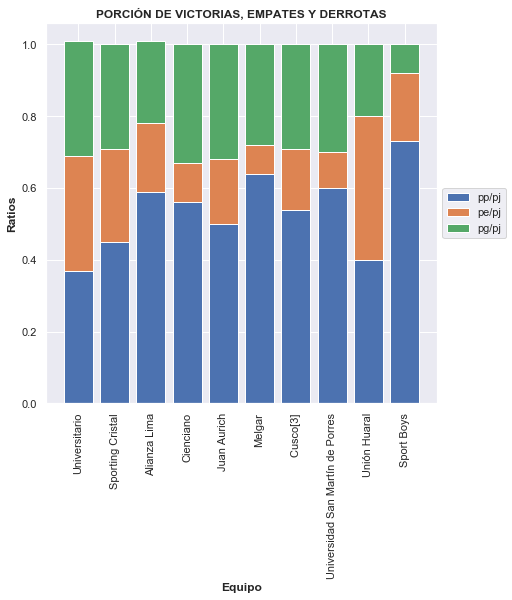

In [36]:
# pg/pj, pe/pj, pp/pj
fig, ax = plt.subplots()
fig.set_size_inches([7,7])
ax.bar(peru_10.equipo, peru_10['pp/pj'], label = 'pp/pj')
ax.bar(peru_10.equipo, peru_10['pe/pj'], bottom = peru_10['pp/pj'], label = 'pe/pj')
ax.bar(peru_10.equipo, peru_10['pg/pj'], bottom = peru_10['pp/pj'] + peru_10['pe/pj'], label = 'pg/pj')
ax.set_xlabel('Equipo', fontweight = 'bold')
ax.set_ylabel('Ratios', fontweight = 'bold')
ax.set_title('PORCIÓN DE VICTORIAS, EMPATES Y DERROTAS', fontweight = 'bold')
ax.set_xticklabels(peru_10.equipo, rotation = 90)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

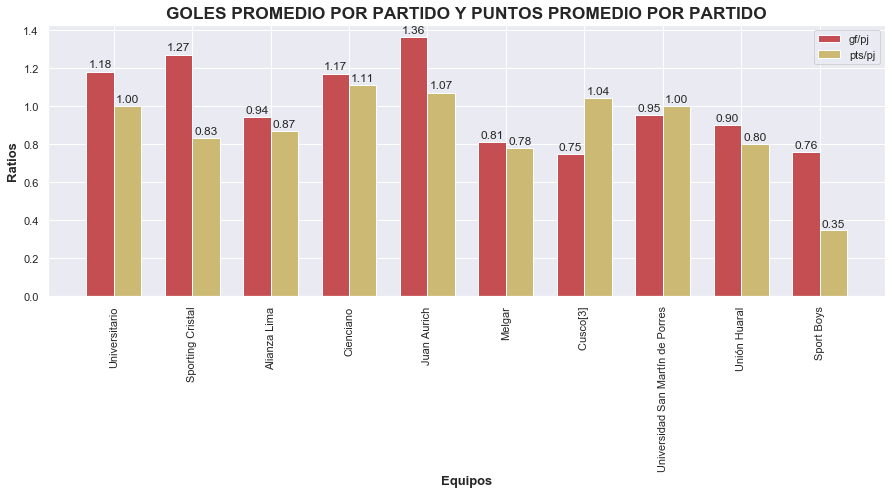

In [35]:
# gf/pj, pts/pj
n = len(peru_10)
ind = np.arange(n)
width = 0.35
fig, ax = plt.subplots()
fig.set_size_inches([15,5])
cont11 = ax.bar(ind, peru_10['gf/pj'], width, color='r')
cont12 = ax.bar(ind+width, peru_10['pts/pj'], width, color='y')
ax.set_ylabel('Ratios', fontsize = 13, fontweight = 'bold')
ax.set_xlabel('Equipos', fontsize = 13, fontweight = 'bold')
ax.set_title('GOLES PROMEDIO POR PARTIDO Y PUNTOS PROMEDIO POR PARTIDO', fontsize = 'x-large', fontweight = 'bold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((peru_10.equipo), rotation = 90)
ax.legend((cont11[0], cont12[0]), ('gf/pj', 'pts/pj'))
autolabel(cont11)
autolabel(cont12)
plt.show()

In [37]:
# los equipos de toda la copa con la peor diferencia de goles
copa_libertadores.nsmallest(5, 'dg')

,posicion,equipo,pais,participaciones,titulos,pj,pg,pe,pp,gf,gc,dg,ptos
35,36,Alianza Lima,Perú,27,0,164,37,31,96,154,283,-169,142
46,47,Deportivo Táchira[1]​,Venezuela,22,0,127,27,34,66,124,233,-119,106
44,45,Jorge Wilstermann,Bolivia,20,0,121,36,23,62,139,238,-99,110
50,51,Oriente Petrolero,Bolivia,21,0,120,29,23,68,131,227,-96,90
22,23,Emelec,Ecuador,28,0,213,66,41,106,223,305,-82,211


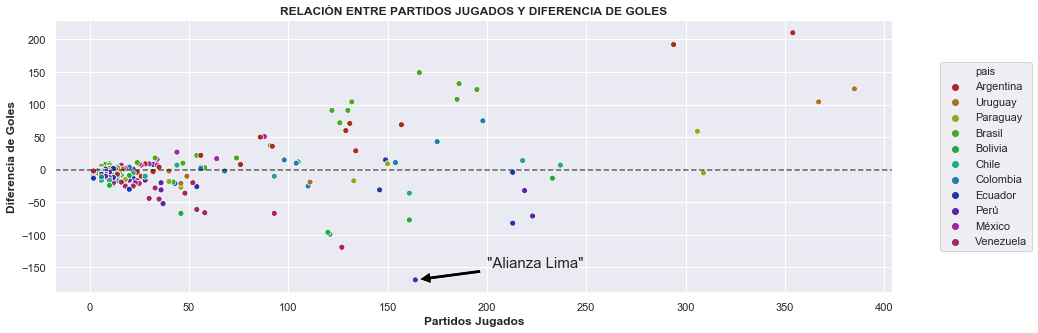

In [42]:
# ver si hay relación entre los partidos jugados y la dierencia de goles
fig, ax = plt.subplots(figsize = (15,5))
sns.scatterplot(x='pj', y='dg', data=copa_libertadores, hue='pais', palette=sns.hls_palette(11, l=.4), ax=ax)
ax.set_xlabel('Partidos Jugados', fontweight = 'bold')
ax.set_ylabel('Diferencia de Goles', fontweight = 'bold')
ax.set_title('RELACIÓN ENTRE PARTIDOS JUGADOS Y DIFERENCIA DE GOLES', fontweight = 'bold')
ax.legend(loc = 'center left', bbox_to_anchor = (1.05,0.5))
ax.axhline(color = 'k', alpha = 0.7, linestyle = '--')
ax.annotate('"Alianza Lima"', xy=(164, -169), xytext=(200, -150), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=15)
plt.show()

# Estadísticas del fútbol peruano en la Copa Libertadores

In [46]:
# estadísticas de los 10 mejores equipos peruanos
eq_per.iloc[:10, 4:13].describe()[1:]

,titulos,pj,pg,pe,pp,gf,gc,dg,ptos
mean,0.0,80.700000,22.200000,19.100000,39.400000,88.800000,128.800000,-44.000000,71.800000
std,0.0,85.363341,25.520362,24.990887,37.244537,104.282522,126.735771,47.595518,78.599972
min,0.0,20.000000,3.000000,2.000000,8.000000,18.000000,34.000000,-169.000000,13.000000
25%,0.0,25.000000,6.250000,4.000000,13.250000,21.250000,39.750000,-47.000000,21.250000
50%,0.0,36.000000,9.500000,6.000000,21.500000,33.500000,61.000000,-25.500000,29.000000
75%,0.0,132.250000,30.750000,25.250000,67.500000,126.000000,232.250000,-16.250000,116.500000
max,0.0,223.000000,69.000000,69.000000,100.000000,283.000000,354.000000,-16.000000,220.000000


In [47]:
# los mayores exponentes por país de acuerdo al ranking o puntos
copa_libertadores.groupby('pais').first().sort_values('posicion')

,posicion,equipo,participaciones,titulos,pj,pg,pe,pp,gf,gc,dg,ptos
pais,,,,,,,,,,,,
Argentina,1,River Plate,36,4,354,172,94,88,581,371,210,540
Uruguay,2,Nacional,47,3,385,165,104,118,542,418,124,506
Paraguay,5,Cerro Porteño,41,0,309,113,89,107,401,406,-5,380
Brasil,7,Grêmio,20,3,195,102,41,52,298,175,123,334
Bolivia,11,Bolívar,34,0,233,92,52,89,341,354,-13,283
Chile,12,Colo-Colo,34,1,237,94,54,89,334,327,7,281
Colombia,13,América de Cali,20,0,198,90,55,53,289,214,75,271
Ecuador,16,Barcelona,26,0,213,79,53,81,255,268,-4,234
Perú,21,Universitario,31,0,219,69,69,81,259,291,-32,220


In [48]:
# mostrar estadísticas agregadas por país: media, suma, mediana
copa_libertadores.groupby('pais')[['participaciones', 'titulos', 'ptos']].agg([np.sum, np.mean, np.median])\
    .sort_values([('titulos','sum'),('ptos','sum')], ascending = False)

participaciones                   titulos                   ptos  \
                      sum       mean median     sum      mean median   sum   
pais                                                                         
Argentina             202   8.782609    4.0      25  1.086957      0  2614   
Brasil                197   7.035714    3.0      19  0.678571      0  2766   
Uruguay               144  11.076923    3.0       8  0.615385      0  1281   
Colombia              139   9.266667    8.0       3  0.200000      0  1345   
Paraguay              144  13.090909    6.0       3  0.272727      0  1231   
Chile                 142   7.473684    2.0       1  0.052632      0  1157   
Ecuador               142   7.888889    3.0       1  0.055556      0  1067   
Bolivia               140   7.777778    2.5       0  0.000000      0   801   
Perú                  140   6.086957    2.0       0  0.000000      0   760   
México                 50   2.777778    2.5       0  0.000000      0   693   
Venezuela             120   4.800000    3.0       0  0.000000      0   534   

                              
                 mean median  
pais                          
Argentina  113.652174   44.0  
Brasil      98.785714   39.5  
Uruguay     98.538462   15.0  
Colombia    89.666667   76.0  
Paraguay   111.909091   33.0  
Chile       60.894737   15.0  
Ecuador     59.277778   13.0  
Bolivia     44.500000   10.5  
Perú        33.043478    6.0  
México      38.500000   25.5  
Venezuela   21.360000   11.0

# THE END